In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

# Performing API Calls

In [3]:
print('''Beginning Data Retrieval     
-----------------------------''')

url = "http://api.openweathermap.org/data/2.5/weather?"
record_number = 0
set_number = 1
city_data = []

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        record_number += 1
        latitude = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        city_data.append({"Name": city, "Latitude": latitude, "Temperature (F)": temperature, "Humidity (%)": humidity, 
                          "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
        print(f"Processing Record {record_number} of Set {set_number} | {city}")
    
    except KeyError: 
        cities.remove(city)
        record_number = 0
        set_number += 1
        print("City not found. Skipping...")
        pass
    
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | cape town
City not found. Skipping...
Processing Record 1 of Set 2 | lujiang
City not found. Skipping...
Processing Record 1 of Set 3 | punta arenas
Processing Record 2 of Set 3 | funadhoo
Processing Record 3 of Set 3 | xining
City not found. Skipping...
Processing Record 1 of Set 4 | vaini
Processing Record 2 of Set 4 | isabela
Processing Record 3 of Set 4 | ushuaia
Processing Record 4 of Set 4 | hasaki
Processing Record 5 of Set 4 | new norfolk
Processing Record 6 of Set 4 | mahebourg
Processing Record 7 of Set 4 | alta
Processing Record 8 of Set 4 | abu kamal
Processing Record 9 of Set 4 | khatanga
Processing Record 10 of Set 4 | alta floresta
Processing Record 11 of Set 4 | san joaquin
City not found. Skipping...
Processing Record 1 of Set 5 | rikitea
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 |

City not found. Skipping...
Processing Record 1 of Set 25 | chokurdakh
Processing Record 2 of Set 25 | husavik
Processing Record 3 of Set 25 | kavieng
Processing Record 4 of Set 25 | durant
Processing Record 5 of Set 25 | yulara
Processing Record 6 of Set 25 | sao joao da barra
Processing Record 7 of Set 25 | san rafael
Processing Record 8 of Set 25 | alcudia
Processing Record 9 of Set 25 | port lincoln
City not found. Skipping...
Processing Record 1 of Set 26 | panguna
Processing Record 2 of Set 26 | geraldton
Processing Record 3 of Set 26 | twin falls
Processing Record 4 of Set 26 | plettenberg bay
Processing Record 5 of Set 26 | baturaja
City not found. Skipping...
Processing Record 1 of Set 27 | salalah
Processing Record 2 of Set 27 | tuatapere
Processing Record 3 of Set 27 | bongandanga
Processing Record 4 of Set 27 | college
Processing Record 5 of Set 27 | hobyo
Processing Record 6 of Set 27 | lillooet
Processing Record 7 of Set 27 | yongan
Processing Record 8 of Set 27 | butarit

Processing Record 22 of Set 45 | lalmohan
Processing Record 23 of Set 45 | ola
Processing Record 24 of Set 45 | beringovskiy
Processing Record 25 of Set 45 | kaitangata
Processing Record 26 of Set 45 | qaqortoq
Processing Record 27 of Set 45 | lorengau
Processing Record 28 of Set 45 | cadillac
City not found. Skipping...
Processing Record 1 of Set 46 | fairbanks
Processing Record 2 of Set 46 | rapid valley
Processing Record 3 of Set 46 | sidney
Processing Record 4 of Set 46 | paragominas
Processing Record 5 of Set 46 | durban
Processing Record 6 of Set 46 | ranong
Processing Record 7 of Set 46 | fortuna
Processing Record 8 of Set 46 | noumea
Processing Record 9 of Set 46 | srednekolymsk
Processing Record 10 of Set 46 | ushirombo
Processing Record 11 of Set 46 | moose factory
City not found. Skipping...
Processing Record 1 of Set 47 | taitung
Processing Record 2 of Set 47 | floro
Processing Record 3 of Set 47 | darab
Processing Record 4 of Set 47 | hervey bay
Processing Record 5 of Set 

# Convert Raw Data to DataFrame

In [4]:
# Create dataframe
weather_df = pd.DataFrame(city_data)

In [5]:
# Write to CSV 
weather_df.to_csv("Output/cities.csv")

In [6]:
# Display DataFrame
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,100,76,-16.48,faanui,300.78,5.47
1,90,80,42.65,albany,273.70,2.10
2,1,77,-33.93,cape town,292.13,7.70
3,90,100,31.26,lujiang,278.15,2.00
4,8,47,-53.16,punta arenas,286.03,5.10
5,100,77,6.15,funadhoo,301.13,7.41
6,0,31,36.62,xining,267.19,2.06
7,5,93,15.34,vaini,290.15,2.90
8,13,74,10.20,isabela,298.92,5.20
9,11,57,-54.81,ushuaia,284.15,3.10


# Plotting the Data

### Latitude vs. Temperature Plot

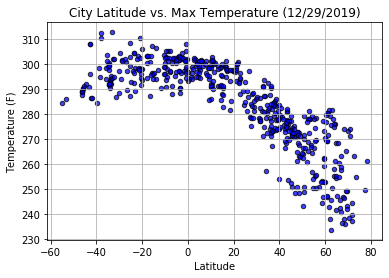

In [7]:
weather_df.plot.scatter(x = "Latitude", y = "Temperature (F)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Max Temperature (12/29/2019)")
plt.savefig("Images/City Latitude vs. Max Temperature.png")
plt.show()

### Latitude vs. Humidity Plot

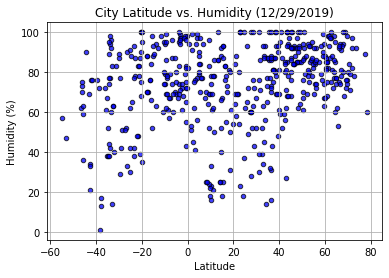

In [8]:
weather_df.plot.scatter(x = "Latitude", y = "Humidity (%)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Humidity (12/29/2019)")
plt.savefig("Images/City Latitude vs. Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

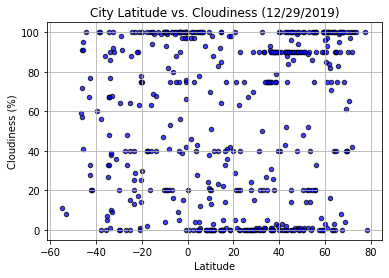

In [9]:
weather_df.plot.scatter(x = "Latitude", y = "Cloudiness (%)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (12/29/2019)")
plt.savefig("Images/City Latitude vs. Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

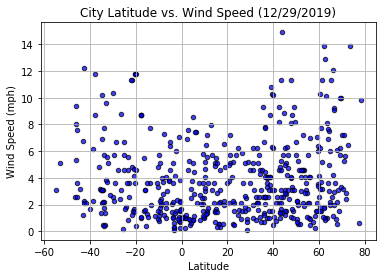

In [10]:
weather_df.plot.scatter(x = "Latitude", y = "Wind Speed (mph)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Wind Speed (12/29/2019)")
plt.savefig("Images/City Latitude vs. Wind Speed.png")
plt.show()